***LINEAR REGRESSION***

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data. It's one of the simplest and most widely used techniques in statistics and machine learning for understanding the relationship between variables. Linear regression is widely used for tasks such as prediction, forecasting, and understanding the relationships between variables in fields like economics, finance, social sciences, and machine learning. However, it assumes a linear relationship between variables and may not perform well with non-linear data.

Types of Linear Regression:

***1. Simple Linear Regression:***
Simple linear regression involves a single independent variable (predictor) to predict the value of a dependent variable (outcome). The relationship between the two variables is assumed to be linear.

***2. Multiple Linear Regression:***
Multiple linear regression extends simple linear regression to include multiple independent variables. It's used when there are two or more predictors influencing the dependent variable.

***3. Polynomial Regression:***
Polynomial regression models the relationship between the independent variable and the dependent variable as an nth-degree polynomial. It's useful when the relationship between variables is non-linear.

***4. Ridge Regression (L2 Regularization):***
Ridge regression is a variant of linear regression that introduces regularization to prevent overfitting. It adds a penalty term (L2 norm) to the ordinary least squares cost function, which helps to stabilize the model and reduce the impact of multicollinearity. It's particularly useful when there is multicollinearity among the independent variables.

***5. Lasso Regression (L1 Regularization):***
Lasso regression is another form of linear regression with regularization. It adds a penalty term (L1 norm) to the ordinary least squares cost function, which can lead to sparsity in the model by driving some of the coefficients to zero. Lasso regression is useful for feature selection, as it can automatically select important features and discard irrelevant ones.

***Data Description***

"The data concerns city-cycle fuel consumption in miles per gallon,to be predicted in terms of 3 multivalued discrete and 5 continuous attributes."

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

***Objective***

We will be performing Linear Regression to find the fuel efficiency of the cars. The aim is to predict the output of a continuous value like price, height, weight, etc.

In [409]:
import warnings
warnings.filterwarnings("ignore")

In [410]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [411]:
df = pd.read_csv("/Users/sayedrizwan/Downloads/auto-mpg 2.csv")

In [412]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [413]:
df.shape

(398, 9)

In [414]:
df = df.drop("car name", axis = 1)

In [415]:
df.drop(df[df['horsepower'] == '?'].index, inplace=True)

In [416]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 27.6+ KB


In [417]:
# Checking no. of categoreis

df.cylinders.unique()

array([8, 4, 6, 3, 5])

In [418]:
df["model year"].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [419]:
df.origin.unique()

array([1, 3, 2])

***CLEANING THE DATASET***

1. Checking the null values and dropping it

In [420]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [421]:
df.dropna(inplace=True)

In [422]:
df.shape

(392, 8)

As there is no null value we would not be dropping any rows or columns.

In [423]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [424]:
df.origin.unique()

array([1, 3, 2])

The origin column is categorical and not numerical.
So we will be converting categorical data to one-hot data.

In [425]:
df["origin"] = df["origin"].map({1: "USA", 2: "Europe", 3: "Japan"})
df = pd.get_dummies(df, columns = ["origin"], prefix = '', prefix_sep = '')

In [426]:
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
0,18.0,8,307.0,130,3504,12.0,70,0,0,1
1,15.0,8,350.0,165,3693,11.5,70,0,0,1
2,18.0,8,318.0,150,3436,11.0,70,0,0,1
3,16.0,8,304.0,150,3433,12.0,70,0,0,1
4,17.0,8,302.0,140,3449,10.5,70,0,0,1
5,15.0,8,429.0,198,4341,10.0,70,0,0,1
6,14.0,8,454.0,220,4354,9.0,70,0,0,1
7,14.0,8,440.0,215,4312,8.5,70,0,0,1
8,14.0,8,455.0,225,4425,10.0,70,0,0,1
9,15.0,8,390.0,190,3850,8.5,70,0,0,1


In [427]:
df.shape

(392, 10)

In [428]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,Europe,Japan,USA
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184,15.541327,75.979592,0.173469,0.201531,0.625000
std,7.805007,1.705783,104.644004,849.402560,2.758864,3.683737,0.379136,0.401656,0.484742
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,105.000000,2225.250000,13.775000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,2803.500000,15.500000,76.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,275.750000,3614.750000,17.025000,79.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


***Comparison between MPG and other numerical values***

In [429]:
def plot(feature):
    plt.figure(figsize=(8,6))
    plt.scatter(df[feature], df["mpg"], label="Data")
    plt.xlabel(feature)
    plt.ylabel("MPG")
    plt.legend()

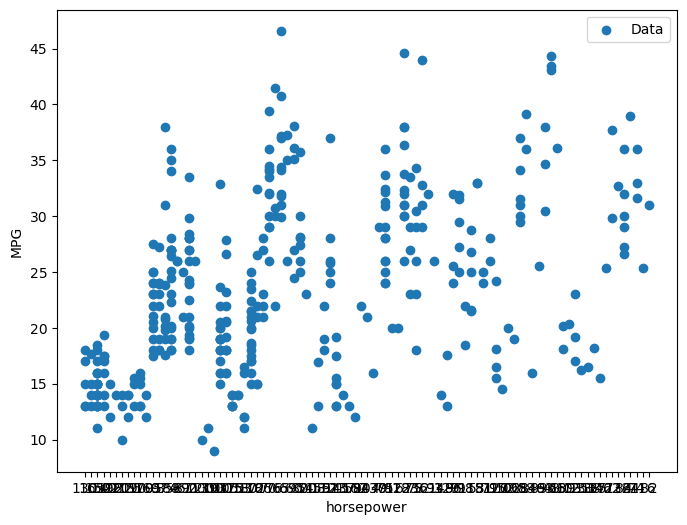

In [430]:
plot("horsepower")

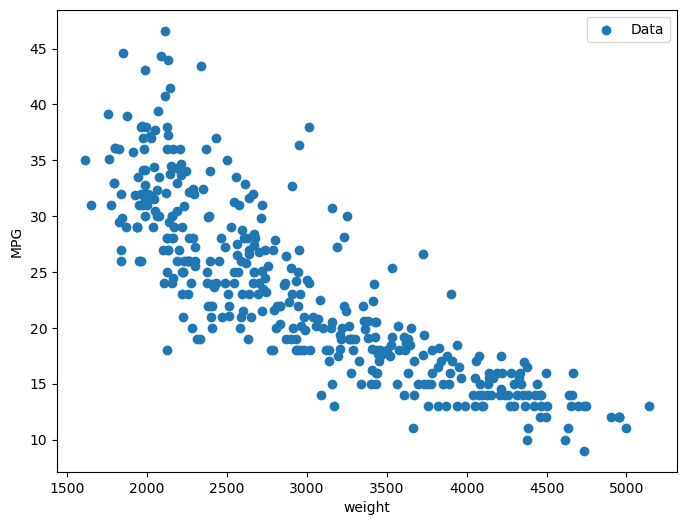

In [431]:
plot("weight")

***PREPARE THE DATA***

1. Separete input and target variable

In [432]:
# input variable
ip_var = df.drop("mpg", axis = 1)

# target variable
target = df["mpg"]

In [433]:
ip_var.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,Europe,Japan,USA
0,8,307.0,130,3504,12.0,70,0,0,1
1,8,350.0,165,3693,11.5,70,0,0,1
2,8,318.0,150,3436,11.0,70,0,0,1
3,8,304.0,150,3433,12.0,70,0,0,1
4,8,302.0,140,3449,10.5,70,0,0,1


2. Split into training and dataset

Split data in train and test set

***x_train:*** independent input data for training the model.

***y_train:*** dependent output data for training the model.

***x_test:*** independent input data for testing the model. It is used to predict the values.

***y_test:*** dependent outplu data. It is used to compare it with the predicted values.

***test_size = 0.20:*** the data is split. 20% data will go in test set and 80% will go in test set.

***random_state = 42:*** it is used a s refernce. Everytime this code is run, same data is loaded in train and test set.

In [434]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ip_var, target, test_size = 0.2, random_state = 42)

In [435]:
ip_var.shape, X_train.shape, X_test.shape

((392, 9), (313, 9), (79, 9))

In [436]:
# As horsepower has some null values, we will be converting it to na values

X_train['horsepower'] = pd.to_numeric(X_train['horsepower'], errors='coerce')

X_train['horsepower'] = X_train['horsepower'].astype(float)

***NORMALIZE THE INPUT DATA***

Reasons to normalize

1. Normalization helps in preventing large magnitude features from dominating the learning process, allowing the algorithm to converge more quickly and effectively.

2. Normalizing features ensures that the optimization process is more stable and less sensitive to the scale of the input data.

3. In some cases, certain algorithms or mathematical computations may suffer from numerical instabilities when dealing with features that vary widely in scale. Normalizing the data can mitigate these numerical issues and ensure the stability of computations.

4. Overall, normalizing data is a critical preprocessing step that enhances the performance, stability, and interpretability of machine learning models, ensuring that they learn effectively from the input data.

In [437]:
# Normalization Layer
# A preprocessing layer that normalizes continuous features

normalizer = tf.keras.layers.Normalization()
normalizer.adapt(np.array(X_train))

In [438]:
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

[[5.48242807e+00 1.95517578e+02 1.04594246e+02 2.98612476e+03
  1.55440893e+01 7.62076721e+01 1.53354630e-01 2.01277956e-01
  6.45367444e-01]]
[[2.8822794e+00 1.0733099e+04 1.4609568e+03 7.0524600e+05 7.9149899e+00
  1.3135786e+01 1.2983699e-01 1.6076514e-01 2.2886831e-01]]


***Building Linear Regression Neural Network***

1. Defining a neural network.
2. Compiling a neural network.
3. Training a neural network.
4. Evaluating a neural network.
5. Predicting a neural network.

***Our Model Architecture***

The architecture is build considering 2 important aspects

1. No. of layers that needs to be created.
2. No of neurons in each layer

For our layer we will be considering the following aspects:

1. input = no. of features in input layer = 9
2. No. of neurons in first dense layer = 64
3. No. of neurons in second dense layer = 64
4. No. of neurons in output layer = 1

In [439]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [440]:
model = Sequential()

In [441]:
# Adding input layer
model.add(normalizer)

# Adding 2 Dense Layer
model.add(Dense(64, activation ="relu", name = "dense_layer_1"))
model.add(Dense(64, activation ="relu", name = "dense_layer_2"))

# Adding output layer
model.add(Dense(1, name="output_layer"))

In [442]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_15 (Normaliz  (None, 9)                 19        
 ation)                                                          
                                                                 
 dense_layer_1 (Dense)       (None, 64)                640       
                                                                 
 dense_layer_2 (Dense)       (None, 64)                4160      
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


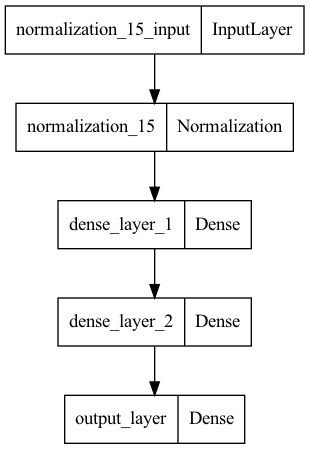

In [443]:
from tensorflow.keras.utils import plot_model
plot_model(model)

***Compiling The Network***

***Adam Optimizer***

Adam (short for Adaptive Moment Estimation) is an optimization algorithm that is widely used for training deep learning models. It combines the advantages of two other popular optimization algorithms, AdaGrad and RMSProp, to provide an adaptive learning rate method that is efficient and effective for a wide range of deep learning tasks.

In [444]:
from tensorflow.keras.optimizers import Adam

model.compile(loss="mean_absolute_error", optimizer = Adam(0.001)) #0.001 is the learning rate

In [445]:
# Training the model

linear_regressor = model.fit(X_train, y_train, validation_split=0.2, epochs = 20, batch_size = 16, verbose = 1)

Epoch 1/20
16/16 [==============================] - 1s 11ms/step - loss: 22.6315 - val_loss: 23.6519
Epoch 2/20
16/16 [==============================] - 0s 4ms/step - loss: 20.9663 - val_loss: 21.6951
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 18.4495 - val_loss: 18.5330
Epoch 4/20
16/16 [==============================] - 0s 4ms/step - loss: 14.8900 - val_loss: 14.5773
Epoch 5/20
16/16 [==============================] - 0s 3ms/step - loss: 11.0313 - val_loss: 9.3336
Epoch 6/20
16/16 [==============================] - 0s 3ms/step - loss: 6.6089 - val_loss: 5.7932
Epoch 7/20
16/16 [==============================] - 0s 4ms/step - loss: 4.7911 - val_loss: 4.4792
Epoch 8/20
16/16 [==============================] - 0s 4ms/step - loss: 3.6807 - val_loss: 3.4690
Epoch 9/20
16/16 [==============================] - 0s 3ms/step - loss: 3.0755 - val_loss: 3.0838
Epoch 10/20
16/16 [==============================] - 0s 3ms/step - loss: 2.7790 - val_loss: 2.5142
Epoch 11/

In [446]:
y_train.shape, X_train.shape

((313,), (313, 9))

In [447]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
Europe            uint8
Japan             uint8
USA               uint8
dtype: object

In [448]:
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

score = model.evaluate(x = X_test, y =y_test, verbose = 0)
print(score)

1.905936360359192


In [449]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
Europe            uint8
Japan             uint8
USA               uint8
dtype: object

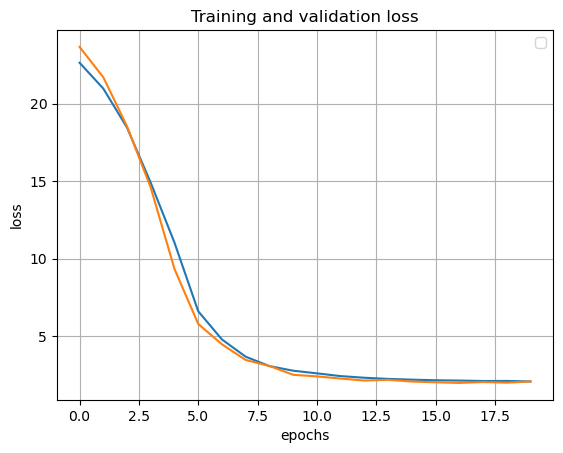

In [454]:
plt.plot(linear_regressor.history['loss'])
plt.plot(linear_regressor.history['val_loss'])

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend("Train", "Validation")
plt.title("Training and validation loss")


plt.grid()
plt.show()

***Prediction using trained neural network***

In [455]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 3ms/step


In [456]:
# Prediction for first 10 data points

y_pred[:10]

array([[25.196695],
       [22.9171  ],
       [34.366547],
       [28.132208],
       [30.12739 ],
       [29.478617],
       [13.158966],
       [29.795286],
       [17.58026 ],
       [29.937658]], dtype=float32)

In [457]:
# Flatted 2D array to 1D array

y_pred = y_pred.flatten()

In [458]:
# Compare test and predicted data points

print("Actual Values", np.array(y_test[:10]))
print("Predicted Values", y_pred[:10])

Actual Values [26.  21.6 36.1 26.  27.  28.  13.  26.  19.  29. ]
Predicted Values [25.196695 22.9171   34.366547 28.132208 30.12739  29.478617 13.158966
 29.795286 17.58026  29.937658]


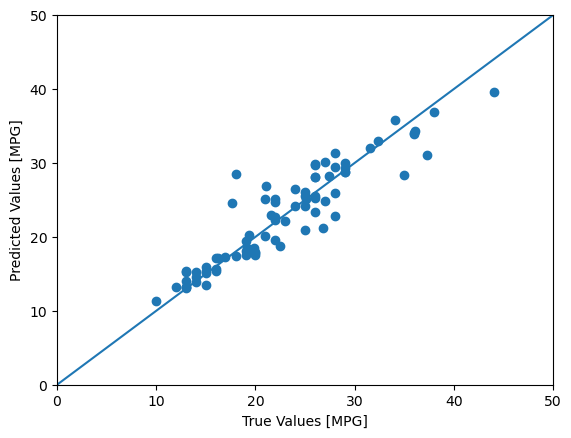

In [462]:
plt.scatter(np.array(y_test), y_pred)
plt.xlabel("True Values [MPG]")
plt.ylabel("Predicted Values [MPG]")

lims = [0,50]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims)

Text(0, 0.5, 'Counts')

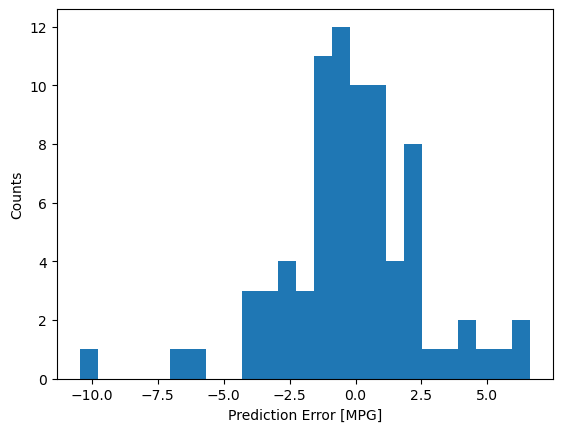

In [463]:
# Checking the distribution of errors

error = y_test - y_pred
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
plt.ylabel("Counts")